# Solutions to sheet 2

In [9]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      import libraries
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import griddata, UnivariateSpline
from matplotlib.pyplot import * # plotting library
import math
import pylab
from matplotlib import ticker
from mpmath import mp
import mpmath
from numpy import random

from scipy.optimize import curve_fit  
import scipy.optimize as spo

In [10]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
#	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30})
plt.rcParams.update({'font.size': 20})

## Solution 2-1:

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [12]:
## Answer 2-1

ntest=5000
data=list(range(ntest))
m=85*1.66*1e-27
kb=1.38*1e-23
T=300

mu=0
sigma=(kb*T/m)**0.5

# Generate the data for N particles

for i in range(0,ntest):
    data[i]=random.normal(0,sigma)
    


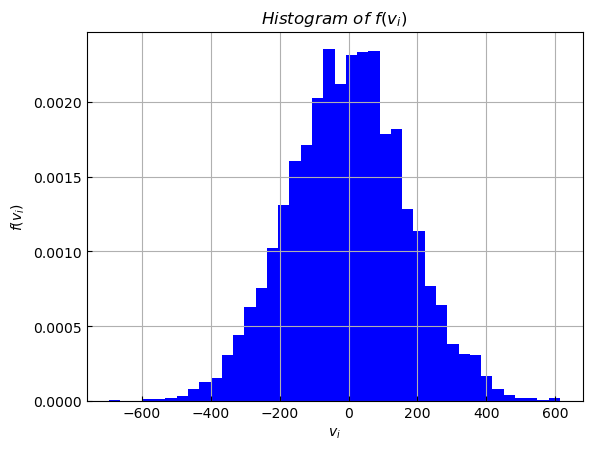

In [13]:
# plot the data
    
plt.hist(data, 40, density=True, facecolor='b')
plt.xlabel(r'$v_i$')
plt.ylabel(r'$f(v_i)$')
plt.title(r'$Histogram\ of\ f(v_i)$')
plt.tick_params(direction='in')
plt.grid(True)
plt.show()

In [14]:
from scipy.stats import skew
from scipy.stats import kurtosis

print('skewness=',skew(data))
print('kurtosis=',kurtosis(data))

skewness= 0.01864199450274934
kurtosis= 0.05647130616587415


The average is $0$ and the variance is $\sqrt{k_B T/m}$.

## Solution 2-2:

In [15]:
## Answer 2-2

vdata=list(range(ntest)) # array of the total speed

vidata=list(range(3)) # array of velocity on each direction

for i in range(0,3):
    vidata[i]=list(range(ntest))
    for j in range(0,ntest):
        vidata[i][j]=np.random.normal(mu,sigma)
    
for i in range(0,ntest):
    vdata[i]=(vidata[0][i]**2+vidata[1][i]**2+vidata[2][i]**2)**0.5

## draw the fitting functions

xfit=np.arange(0,1000,5)
nfit=len(xfit)
yfit=list(range(nfit))
fac=m/(2*math.pi*kb*T)
for i in range(0,nfit):
    yfit[i]=fac**1.5*(4*math.pi*(xfit[i]**2))*(math.e**(-m*(xfit[i]**2)/(2*kb*T)))

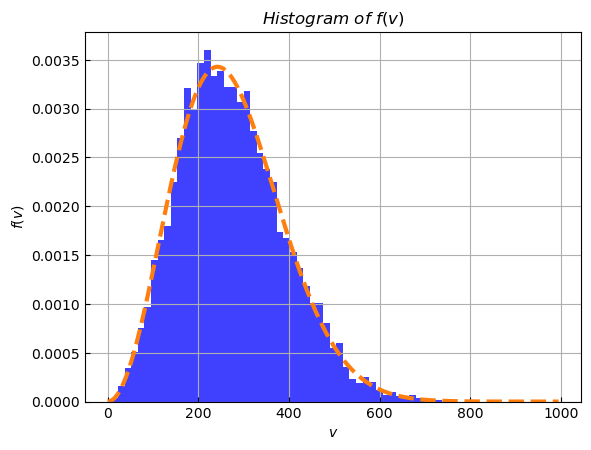

In [16]:
# plot the data
 
plt.hist(vdata, 50,density=True, facecolor='b', alpha=0.75)
plot(xfit,yfit,'--',lw=3)
plt.xlabel(r'$v$')
plt.ylabel(r'$f(v)$')
plt.title(r'$Histogram\ of\ f(v)$')
#plt.text(60, .025)
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.tick_params(direction='in')
plt.grid(True)
plt.show()

Analaytically, one can compute this distribution by computing $f(v,\theta,\phi)$ and then integrated over $\theta$ and $\phi$

## Solution 2-3:
The distribution follows $f(E_k)=2\sqrt{E_k/\pi}(1/k_B T)^{3/2}exp(-E_k/k_B T)$

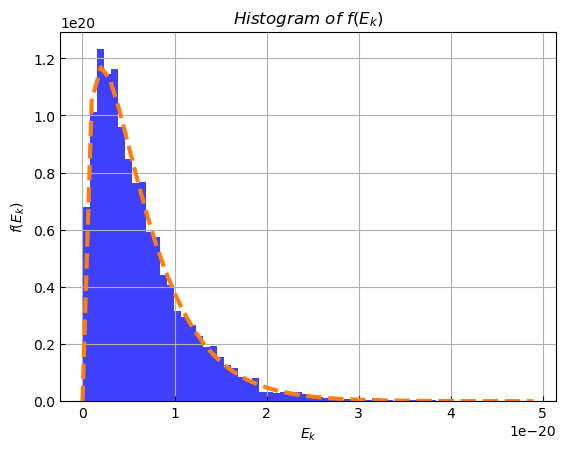

In [17]:
## Answer 2-3

edata=list(range(ntest)) # array of the kinetic energy

for i in range(0,ntest):
    edata[i]=0.5*m*(vdata[i]**2)
    
## draw the fitting functions

xfit=np.arange(0,5e-20,1e-21)
nfit=len(xfit)
yfit=list(range(nfit))
fac=m/(2*math.pi*kb*T)
for i in range(0,nfit):
    yfit[i]=2*(1.0/(kb*T))**1.5*(xfit[i]/math.pi)**0.5*(math.e**(-xfit[i]/(kb*T)))

    
plt.hist(edata, 50, density=True, facecolor='b', alpha=0.75)
plot(xfit,yfit,'--',lw=3)
plt.xlabel(r'$E_k$')
plt.ylabel(r'$f(E_k)$')
plt.title(r'$Histogram\ of\ f(E_k)$')
#plt.text(60, .025)
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.tick_params(direction='in')
plt.grid(True)
plt.show() 

In [18]:
print('skewness=',skew(edata))
print('kurtosis=',kurtosis(edata))

skewness= 1.6027742312315396
kurtosis= 3.5523605686055726


### * One additional plot to have a look (just for fun):

We can plot the distribution of $E_k$ at various temperature. This is not asked in the exercise but it recovers what you learn in statstical physics class.

In [19]:
## Answer 2-3*
m=85*1.66*1e-27
kb=1.38*1e-23
mu=0
    
def ekdistribution(Tinput,Ninput):
    sigma=(kb*Tinput/m)**0.5
    ekoutput=list(range(Ninput))
    for i in range(0,Ninput):
        ekoutput[i]=0
        for j in range(0,3):
            ekoutput[i]+=np.random.normal(mu,sigma)**2
        ekoutput[i]*=0.5*m
    return ekoutput

In [20]:
temperature=[50,100,300]
ekdata=list(range(3))

for i in range(0,3):
    ekdata[i]=ekdistribution(temperature[i],ntest)


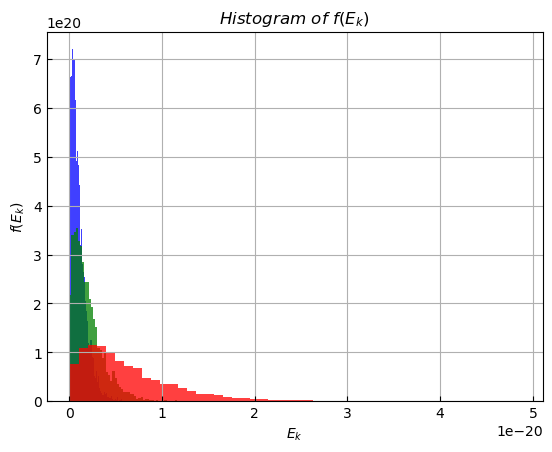

In [21]:

plt.hist(ekdata[0], 50, density=True, facecolor='b', alpha=0.75)
plt.hist(ekdata[1], 50, density=True, facecolor='g', alpha=0.75)
plt.hist(ekdata[2], 50, density=True, facecolor='r', alpha=0.75)
plt.xlabel(r'$E_k$')
plt.ylabel(r'$f(E_k)$')
plt.title(r'$Histogram\ of\ f(E_k)$')
plt.tick_params(direction='in')
plt.grid(True)
plt.show()

## Solution 2-4:

In [22]:
T=300
ekdata=ekdistribution(T,900)

print('Expectation value=',sum(ekdata)/len(ekdata))
print('Variance=',np.var(data))

Expectation value= 6.226139317644019e-21
Variance= 29081.169747974716


In [23]:
print('Expectation value in unit of k_B*T',sum(ekdata)/len(ekdata)/(kb*T))
print('Variance in unit of (k_B*T)^2=',np.var(ekdata)/((kb*T)**2))

Expectation value in unit of k_B*T 1.5038983859043527
Variance in unit of (k_B*T)^2= 1.8398709434055673


## Solution 2-5

In [24]:
Nexp=400
ekavg=list(range(Nexp))

for i in range(0,Nexp):
    ekdata=ekdistribution(T,900)
    ekavg[i]=sum(ekdata)/len(ekdata)
    


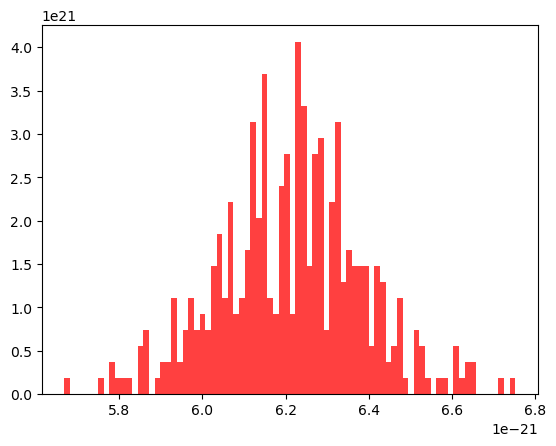

In [25]:
bin_entries, bin_edges, _ =plt.hist(ekavg, 80, density=True, facecolor='r', alpha=0.75)
bin_centers = np.array([0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)])


## Solution 2-6-1:
Perform the fit to the Gaussian

In [26]:

def gauss(x, mu, sigma):
    ## Define the Gaussian shape for the fit later
    pref = 1 / sigma / np.sqrt(2 * np.pi)
    return pref * np.exp(- pow(x - mu, 2) / 2 / sigma / sigma)

In [27]:
C=1e21 ## Here, we use the C factor to make bin_centers and bin_entries around 1, so that the python fit can be perform properly

for i in range(0,len(bin_centers)):
    bin_entries[i]/=C
    bin_centers[i]*=C

popt, pcov = spo.curve_fit(gauss, bin_centers, bin_entries)
binfit=gauss(bin_centers, *popt)
popt[0]/=C
popt[1]/=C

print(popt)
print(pcov)

[6.21573326e-21 1.64964371e-22]
[[1.31114123e-04 4.45522628e-09]
 [4.45522628e-09 8.74489475e-05]]


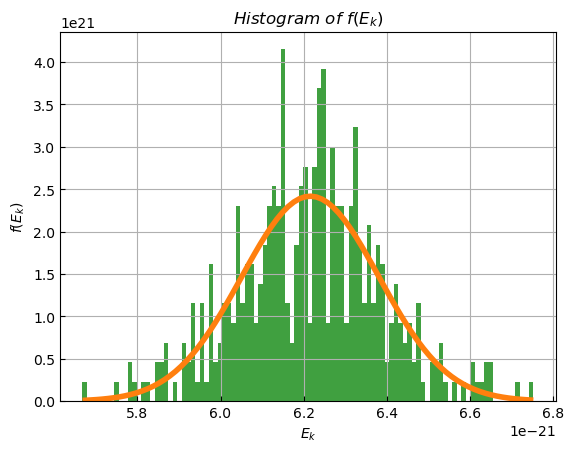

In [28]:
for i in range(0,len(bin_centers)):
    binfit[i]*=C
    bin_centers[i]/=C
 
    
plt.hist(ekavg, 100, density=True, facecolor='g', alpha=0.75)
plt.plot(bin_centers, binfit, lw=4,
         label='fit: mu=%.2f, sigma=%.2f' % tuple(popt))

plt.xlabel(r'$E_k$')
plt.ylabel(r'$f(E_k)$')
plt.title(r'$Histogram\ of\ f(E_k)$')
plt.tick_params(direction='in')
plt.grid(True)
plt.show() 

## Solution 2-6-2:
Compute the ratio $\sigma_{E (E_k) }/\sigma_{E_k}$ (here we compute the inverse below)

In [29]:
print("The ratio of the two standard variance is",1.5**0.5*(kb*T)/popt[1])

The ratio of the two standard variance is 30.736599261673565
